<a href="https://colab.research.google.com/github/EhLeeOod/Prediction-of-Product-Sales/blob/main/Part_5_Project_1_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 5 (Core)

We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.


Before splitting your data, you can:

-  drop duplicates

- fix inconsistencies in categorical data

- Identify the features (X) and target (y)

    - Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
    - Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.

- Perform a train test split

- Impute values after train_test_split using SimpleImputer.

- Create a preprocessing object to prepare the dataset for Machine Learning



## Data Dictionary

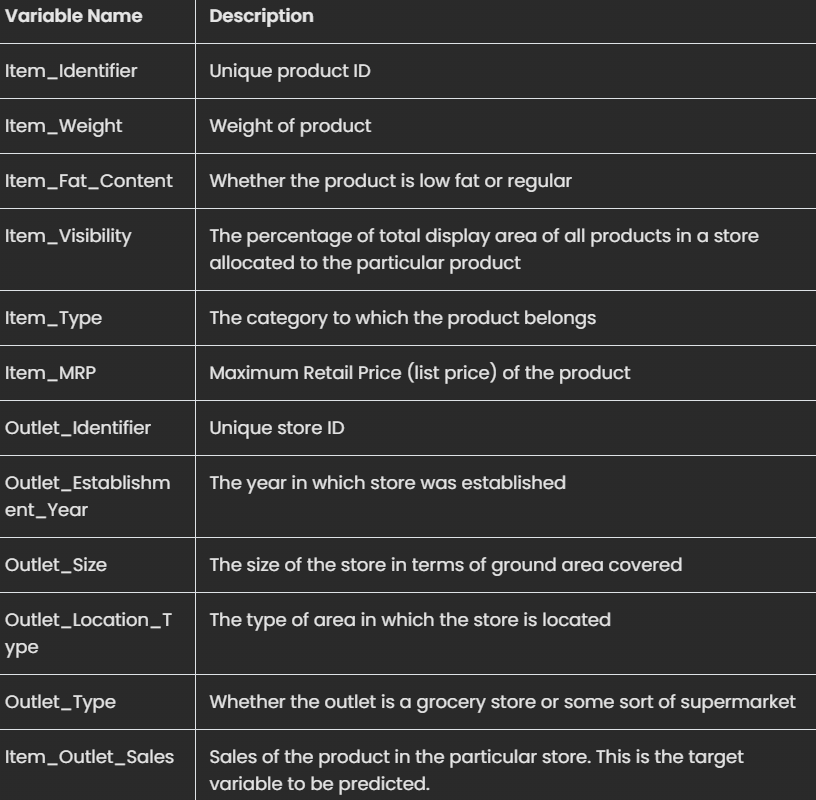

In [3]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)

In [4]:
# load data
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### drop duplicates

In [5]:
# create duplicate filter
duplicate_rows = df.duplicated().sum()

# run to check for duplicates
duplicate_rows

0

### fix inconsistencies in categorical data

In [6]:
# create categorical filter
cat_cols = df.select_dtypes('object').columns

# run filter
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [7]:
# use for loop to run .value_counts() on categorical columns
for col in cat_cols:
    print(df[col].value_counts(),'\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

In [8]:
# view Item_Fat_Content value counts
df['Item_Fat_Content'].value_counts()

# create dictionary and use .replace() inconsistent values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})

# view updated .value_counts()
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
# Outlet_Size
df['Outlet_Size'].value_counts()

# create dictionary and use .replace() inconsistent values
df['Outlet_Size'] = df['Outlet_Size'].replace({"High": "Large"})

# view updated .value_counts()
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

### Identify the features (X) and target (y)

In [10]:
# Assign the "Item_Outlet_Sales" column as your target
y = df['Item_Outlet_Sales']

# Assign the rest of the relevant variables as your features matrix. Drop 'Item_Identifier' due to high cardinality
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'])

### Perform a train test split

In [11]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Impute values after train_test_split using SimpleImputer.

In [12]:
# check for missing values
df.isna().sum()

# create numeric columns list
num_cols = X_train.select_dtypes('number').columns

# view list
num_cols

# create categorical filter
cat_cols = X_train.select_dtypes('object').columns

# run filter
cat_cols

# instantiate numeric imputer with strategy 'median'
impute_median = SimpleImputer(strategy='median')

# create scaler for numeric columns
scaler = StandardScaler()

# create numeric pipeline
num_pipe = make_pipeline(impute_median, scaler)

# instantiate categorical imputer with strategy 'constant'
impute_missing = SimpleImputer(strategy='most_frequent')

# create ohe for categorical columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# make categorical pipeline
cat_pipe = make_pipeline(impute_missing, ohe_encoder)

### Create a preprocessing object to prepare the dataset for Machine Learning
    - The whole point of using ColumnTransformer is so that we don't have to fit/transform individual transformers or pipelines

    - Remove the redundant code and only fit/transform the ColumnTransformer object

In [13]:
# create numeric tuple
numeric_tuple = ('numeric', num_pipe, num_cols)

# run numeric tuple
numeric_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [14]:
# create categorical tuple
ohe_tuple = ('categorical', cat_pipe, cat_cols)

# run categorical tuple
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [15]:
# create ColumnTransformer to preprocess data
column_transformer = ColumnTransformer([numeric_tuple, ohe_tuple], remainder='passthrough', verbose_feature_names_out=False)

In [16]:
# fit ColumnTransformer on training data
column_transformer.fit(X_train)

# Transform the training data
X_train_processed_demo = column_transformer.transform(X_train)

# Transorm the test data
X_test_processed_demo = column_transformer.transform(X_test)

# View the result
X_train_processed_demo.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
